## Introduction

This is a jupyter notebook that accompanies the conference proceedings:

Stochastic Structural Modeling of a Geothermal Field: Patua Geothermal Field Case Study

The code in this notebook uses the package PyNoddy, see https://github.com/flohorovicic/pynoddy

If there are any issues with this notebook, please let me know: ahinoamp@stanford.edu

I'll be adding a YouTube Tutorial soon.

## Imports 

In [1]:
###############
# some imports
###############
import itertools, k3d, matplotlib, meshio, pynoddy, sys, os, subprocess, time, vtk
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import scipy.interpolate as interp
from shutil import copyfile
from vtkplotter import *
import PriorModelPlottingUtilty as util
util.importModulesAndSetup()
import pynoddy.history
import pynoddy.experiment
import pynoddy.events
import ipywidgets as widgets
from IPython.display import display
from IPython.display import Javascript
import importlib
importlib.reload(pynoddy)
importlib.reload(pynoddy.events)

<module 'pynoddy.events' from '/srv/conda/envs/notebook/lib/python3.7/site-packages/pynoddy/events.py'>

## View 3D models from Stanford Geothermal Workshop

In [2]:
plot_scenario = widgets.Dropdown(options = ['Choose a Scenario', 'Scenario1_LowResolution', 'Scenario2_LowResolution', 'Scenario3_LowResolution', 'Scenario1_MedResolution', 'Scenario2_MedResolution', 'Scenario3_MedResolution', 'Scenario1_HighResolution', 'Scenario2_HighResolution', 'Scenario3_HighResolution'])
def plot_scenario_eventhandler(change):
    if ((change.new != change.old)& (change.new !='Choose a Scenario')):
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))
plot_scenario.observe(plot_scenario_eventhandler, names='value')
display(plot_scenario)

Dropdown(options=('Choose a Scenario', 'Scenario1_MedResolution', 'Scenario2_MedResolution', 'Scenario3_MedRes…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
plot = Plotter(axes=1, bg='white', interactive=1)
settings.embedWindow('itkwidgets') #you can also choose to change to itkwidgets, k3d, False (popup)
util.PlotScenarios(plot_scenario.value, plot, plotwells =0)
plot.show(viewup='z')

Finished calculating model
Calculation time took 25.61471438407898 seconds
Parsing time took 12.62388014793396 seconds
The number of triangle elements (cells/faces) is: 292396
Convert 2 VTK time took 1.406174659729004 seconds


Viewer(cmap='jet', geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_point…

## Generate Realizations

In [11]:
scenario2plot = widgets.Dropdown(options = ['Choose a Scenario', 'Scenario_1', 'Scenario_2', 'Scenario_3'])
gridSize2Choose = widgets.Dropdown(options = ['Choose a Block Size', '50(m) - HighRes', '100(m) - MedRes', '150(m) - LowRes'])
display(scenario2plot)
display(gridSize2Choose)
btn = widgets.Button(description='Run')
def btn_eventhandler(obj):
    Run=1
    if(scenario2plot.value=='Choose a Scenario'):
        print('Please choose a scenario')
        Run=0
    if(gridSize2Choose.value=='Choose a Block Size'):
        print('Please choose a block size')
        Run = 0
    if(Run):
        print('Running')
        display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+3)'))
btn.on_click(btn_eventhandler)
display(btn)

Dropdown(options=('Choose a Scenario', 'Scenario_1', 'Scenario_2', 'Scenario_3'), value='Choose a Scenario')

Dropdown(options=('Choose a Block Size', '50(m) - HighRes', '100(m) - MedRes', '150(m) - LowRes'), value='Choo…

Button(description='Run', style=ButtonStyle())

Running


<IPython.core.display.Javascript object>

In [12]:
print('This is the structural uncertainty table for ' + scenario2plot.value)
TableFile ='Data/PriorUncertaintyTables/PriorUncertaintyTable_'+ scenario2plot.value+'.csv'
PriorStructuralModelTable = pd.read_csv(TableFile)
PriorStructuralModelTable.head(50)

This is the structural uncertainty table for Scenario_1


,Property,Parameter,Event Number,Event Name,Parameter Value
0,Density,Prior distribution type,1,Sed,Gaussian
1,Density,Prior distribution paramter 1,1,Sed,2.328
2,Density,Prior distribution paramter 2,1,Sed,0.189
3,Density,Prior distribution type,1,Felsic,Gaussian
4,Density,Prior distribution paramter 1,1,Felsic,2.386
5,Density,Prior distribution paramter 2,1,Felsic,0.149
6,Density,Prior distribution type,1,Mafic,Gaussian
7,Density,Prior distribution paramter 1,1,Mafic,2.531
8,Density,Prior distribution paramter 2,1,Mafic,0.106
9,Density,Prior distribution type,1,Intrusive,Gaussian


Finished calculating model
The number of triangle elements (cells/faces) is: 130369
Finished calculating model
The number of triangle elements (cells/faces) is: 132000
Finished calculating model
The number of triangle elements (cells/faces) is: 130076
Finished calculating model
The number of triangle elements (cells/faces) is: 129504
0
Finished calculating model
1
Finished calculating model
2
Finished calculating model
3
Finished calculating model


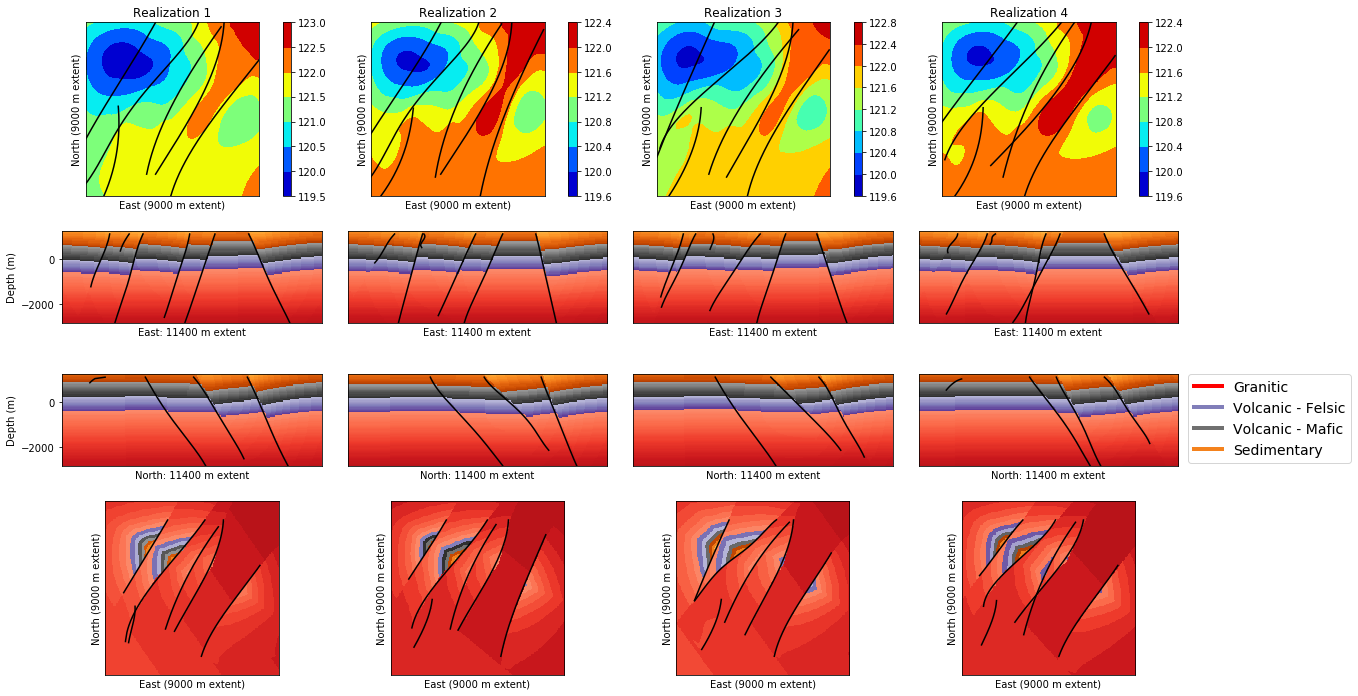

In [13]:
util.GenerateRealizations(RealizationName=scenario2plot.value, nrealizations=4, cubesizetxt = gridSize2Choose.value, outputoption = 'ALL', foldersuffix = '')
util.plotRealizations(RealizationName=scenario2plot.value, foldersuffix = '')

## More code on using PyNoddy (Extra Material)

### Calculate a model

In [36]:
# Model with five faults three layers 
modelfile = 'Data/ThreeLayer.his'

#Alter the mesh size if desiring to speed up the process. Recommended size is 100
output_name = 'noddy_out'
cubesize = 100
includeGravityCalc = 0
xy_origin=[317883,4379646, 1200-5000]

settings.embedWindow('itkwidgets') #you can also choose to change to itkwidgets, k3d, False (popup)

plot = Plotter(axes=1, bg='white', interactive=1)

H1 = pynoddy.history.NoddyHistory(modelfile)
points = util.CalculatePlotStructure(H1,output_name, plot, includeGravityCalc, cubesize = cubesize, xy_origin=xy_origin)
plot.show(viewup='z')

Finished calculating model
Calculation time took 18.8148512840271 seconds
Parsing time took 9.196089744567871 seconds
The number of triangle elements (cells/faces) is: 252353
Convert 2 VTK time took 1.0036206245422363 seconds


Viewer(cmap='jet', geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_point…

## Get some information about the model

In [37]:
N1 = pynoddy.output.NoddyOutput(output_name)

[maxX, maxY, maxZ] = np.max(points, axis=0)
[minX, minY, minZ] = np.min(points, axis=0)
minZ = xy_origin[2]

x = np.linspace(minX, maxX, N1.nx, dtype=np.float32)
y = np.linspace(minY, maxY, N1.ny, dtype=np.float32)
z = np.linspace(minZ, maxZ, N1.nz, dtype=np.float32)

delx = x[1]-x[0]
dely = y[1]-y[0]
delz = z[1]-z[0]

print("The model has an extent of %.0f m in x-direction, with %d cells of width %.0f m" %
      (maxX-minX, N1.nx, delx))
print("The model has an extent of %.0f m in y-direction, with %d cells of width %.0f m" %
      (maxY-minY, N1.ny, dely))
print("The model has an extent of %.0f m in z-direction, with %d cells of width %.0f m" %
      (maxZ-minZ, N1.nz, delz))

The model has an extent of 12000 m in x-direction, with 144 cells of width 84 m
The model has an extent of 7000 m in y-direction, with 94 cells of width 76 m
The model has an extent of 5000 m in z-direction, with 50 cells of width 102 m


## Changing around the model parameters

In [38]:
start = time.time()
H1 = pynoddy.history.NoddyHistory(modelfile)

H1.events[3].properties['Dip'] = 40
H1.events[3].properties['X'] = 10000
H1.events[4].properties['Slip'] = 400
H1.events[5].properties['Dip'] = 90
H1.events[5].properties['X'] = 9000
H1.events[2].properties['Rotation'] = 40
H1.events[3].properties['Dip Direction'] = 26
H1.events[3].properties['Slip'] = 400

plot = Plotter()

includeGravityCalc = 1
util.CalculatePlotStructure(H1,output_name, plot, includeGravityCalc, cubesize = cubesize, xy_origin=xy_origin)
end = time.time()
print('Calculation time took '+str(end - start) + ' seconds')

plot.show()

Finished calculating model
Calculation time took 35.8541955947876 seconds
Parsing time took 9.800421237945557 seconds
The number of triangle elements (cells/faces) is: 273294
Convert 2 VTK time took 1.0575370788574219 seconds
Calculation time took 50.739771366119385 seconds


Viewer(cmap='jet', geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_point…

## Some 2D plots

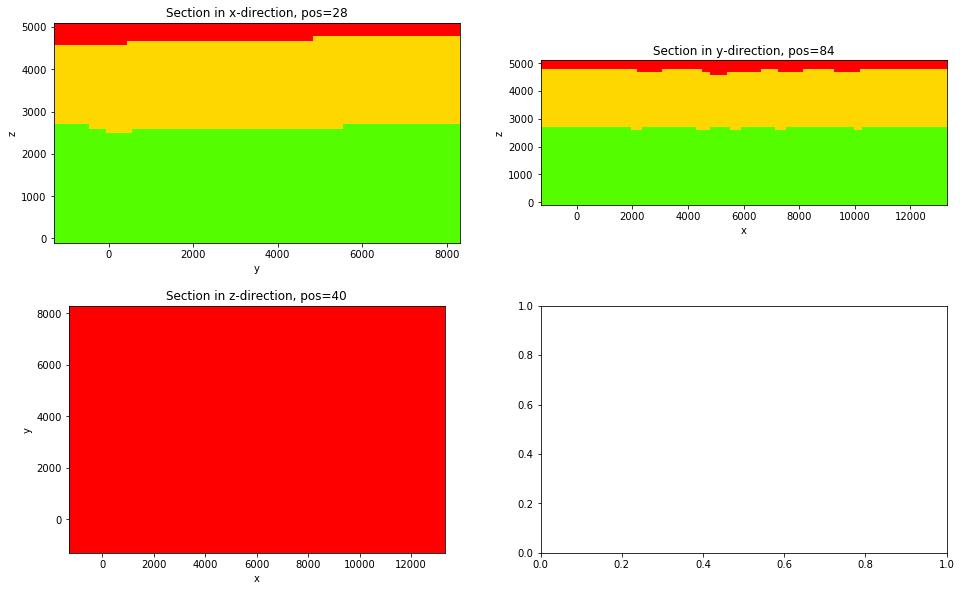

In [39]:
xslice = int(0.2*N1.nx)
yslice = int(0.9*N1.ny)
zslice = int(0.8*N1.nz)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (16, 10))

## X slice
ax = axs[0,0]
N1.plot_section('x', position = xslice, ax = ax, cmap='prism')

## Y slice
ax = axs[0,1]
N1.plot_section('y', position = yslice, ax = ax, cmap='prism')

## Z slice
ax = axs[1,0]
N1.plot_section('z', position = zslice, ax = ax, cmap='prism')

## Calculate gravity

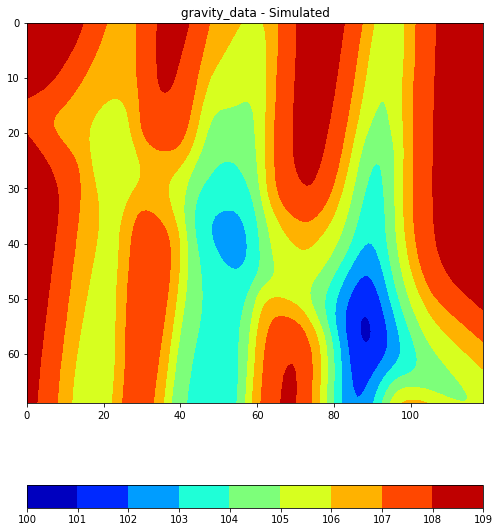

In [40]:
geophys = pynoddy.output.NoddyGeophysics(output_name)
fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(121)
cf = ax.contourf(geophys.grv_data, cmap = 'jet')
cbar = plt.colorbar(cf, orientation = 'horizontal')
ax.set_title('gravity_data - Simulated')
plt.gca().invert_yaxis()

## Extract lithology at well paths

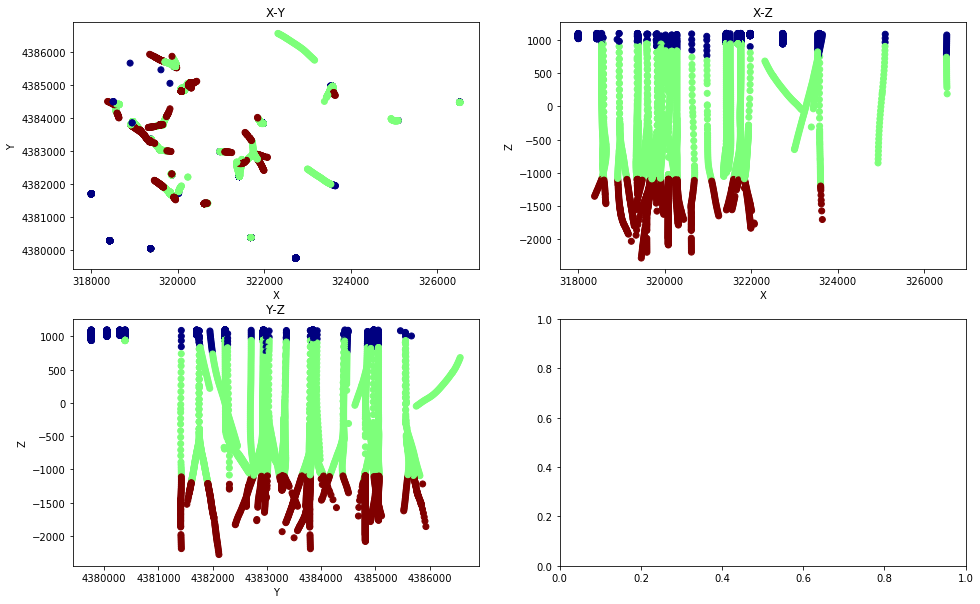

In [41]:
Wells = pd.read_csv('Data/WellNamesPaths.csv')
filterV = (Wells['X_m']>minX+delx) & (Wells['Y_m']>minY+dely) &  (Wells['Z_m']>minZ+delz) & (Wells['X_m']<maxX-delx) & (Wells['Y_m']<maxY-dely) & (Wells['Z_m']<maxZ-delz)
Wells = Wells[filterV]

N1 = pynoddy.output.NoddyOutput(output_name)
lithology = N1.block
    
WellboreColors = util.get_wellbore_voxels_from_paths2(lithology, Wells['X_m'], Wells['Y_m'], Wells['Z_m'], [minX, maxX], [minY, maxY], [minZ, maxZ], [delx, dely, delz])
Wells['Colors'] = WellboreColors

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (16, 10))

ax = axs[0,0]
ax.scatter(Wells['X_m'], Wells['Y_m'], c=Wells['Colors'], cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('X-Y')

ax = axs[0,1]
ax.scatter(Wells['X_m'], Wells['Z_m'], c=Wells['Colors'], cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('X-Z')

ax = axs[1,0]
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_title('Y-Z')
ax.scatter(Wells['Y_m'], Wells['Z_m'], c=Wells['Colors'], cmap='jet')